In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
nb = pd.read_csv('../Datasets/NB.csv')
nb['Fault'] = 0

outer = pd.read_csv('../Datasets/OR - 7.csv')
outer['Fault'] = 1

In [3]:
dataset = nb.append(outer)
dataset

C:\Users\loaia\AppData\Local\Temp\ipykernel_4276\1640988918.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = nb.append(outer)


,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
121150,0.165278,0.099029,1
121151,-0.075938,0.032256,1
121152,-0.268830,0.050747,1
121153,0.012995,0.093687,1


In [4]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [9]:
classifier = Sequential()

In [10]:
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

In [11]:
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

In [13]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [15]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [16]:
model = classifier.fit(X_train, y_train, batch_size = 1000, epochs = 100, shuffle = False)


Epoch 1/100
194/194 [==============================] - 1s 2ms/step - loss: 0.6038 - accuracy: 0.7726
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8440
Epoch 3/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8540
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8541
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8541
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8541
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8542
Epoch 8/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8543
Epoch 9/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8544
Epoch 10/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3357 - accura

194/194 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8546
Epoch 82/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8547
Epoch 83/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8546
Epoch 84/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8546
Epoch 85/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8547
Epoch 86/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8547
Epoch 87/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8547
Epoch 88/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8547
Epoch 89/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8547
Epoch 90/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 

In [17]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

1515/1515 [==============================] - 2s 923us/step


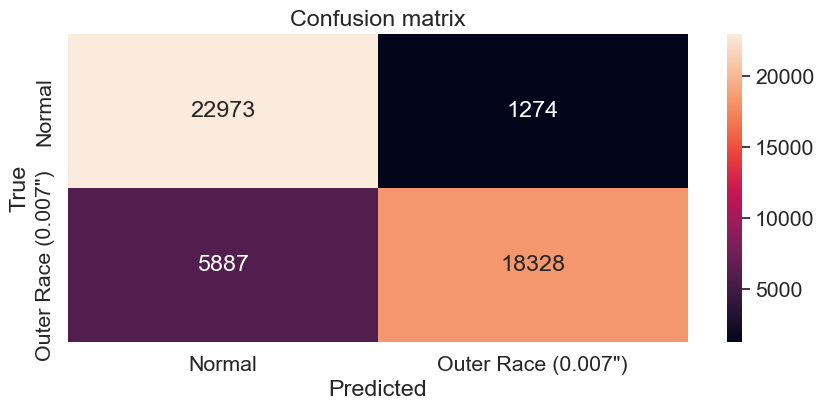

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Outer Race (0.007")']  
columns = ['Normal', 'Outer Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [19]:
classifier.evaluate(X_test, y_test)

1515/1515 [==============================] - 2s 1ms/step - loss: 0.3409 - accuracy: 0.8522


[0.3408646583557129, 0.8522347211837769]

In [20]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Outer Race (0.007")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.80      0.95      0.87     24247
Outer Race (0.007")       0.94      0.76      0.84     24215

           accuracy                           0.85     48462
          macro avg       0.87      0.85      0.85     48462
       weighted avg       0.87      0.85      0.85     48462



In [21]:
normal, OR = cm
anomalies = normal[1] + OR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 7161
